# Imports

In [21]:
from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
from patsy import dmatrices
from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

# Confusion Matrix

In [22]:
with open('final.pkl', 'rb') as handle:
    data = pickle.load(handle)
data.head()

,artist,followers,popularity,spotify_artist_id,albums
0,Kendrick Lamar,8813295,94,2YZyLoL8N0Wb9xBt1NhZWg,DAMN.
1,Kendrick Lamar,8813295,94,2YZyLoL8N0Wb9xBt1NhZWg,DAMN. COLLECTORS EDITION.
2,Kendrick Lamar,8813295,94,2YZyLoL8N0Wb9xBt1NhZWg,Overly Dedicated
3,Kendrick Lamar,8813295,94,2YZyLoL8N0Wb9xBt1NhZWg,"King's Dead (with Kendrick Lamar, Future & Jam..."
4,Kendrick Lamar,8813295,94,2YZyLoL8N0Wb9xBt1NhZWg,"good kid, m.A.A.d city (Deluxe)"


In [23]:
df = data.drop(columns=['spotify_artist_id'])
df.head()

,artist,followers,popularity,albums
0,Kendrick Lamar,8813295,94,DAMN.
1,Kendrick Lamar,8813295,94,DAMN. COLLECTORS EDITION.
2,Kendrick Lamar,8813295,94,Overly Dedicated
3,Kendrick Lamar,8813295,94,"King's Dead (with Kendrick Lamar, Future & Jam..."
4,Kendrick Lamar,8813295,94,"good kid, m.A.A.d city (Deluxe)"


In [24]:
from patsy import dmatrices
y,X=dmatrices('popularity ~ followers',data=df,return_type='dataframe')

In [25]:
def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Could be a typical function for classifying:

def train_score(classifier,x,y):
    xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(x, y, test_size=0.2, random_state=1234)
    ytrain=np.ravel(ytrain)
    clf = classifier.fit(xtrain, ytrain)
    # accuracy for test & train:
    train_acc=clf.score(xtrain, ytrain)
    test_acc=clf.score(xtest,ytest)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    
    y_true = ytest
    y_pred = clf.predict(xtest)


    conf = confusion_matrix(y_true, y_pred)
    print(conf)

    print ('\n')
    print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
    print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
    
    cm=confusion_matrix(y_true, y_pred, labels=None)
    
    plt.figure()
    plot_confusion_matrix(cm)

Training Data Accuracy: 0.99
Test Data Accuracy:     0.99
[[ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0 

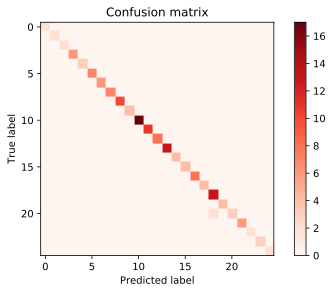

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
log_clf=LogisticRegression()
train_score(log_clf,X,y)

# ROC Curve

In [27]:
from sklearn.metrics import roc_curve, auc

xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(X, y, test_size=0.2, random_state=1234)
log = LogisticRegression()
log.fit(xtrain,np.ravel(ytrain))
y_score=log.predict_proba(xtest)[:,1]

fpr, tpr,_ = roc_curve(ytest, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

ValueError: multiclass format is not supported

In [28]:
tpr

NameError: name 'tpr' is not defined

In [30]:
data

,artist,followers,popularity,spotify_artist_id,albums
0,Kendrick Lamar,8813295,94,2YZyLoL8N0Wb9xBt1NhZWg,DAMN.
1,Kendrick Lamar,8813295,94,2YZyLoL8N0Wb9xBt1NhZWg,DAMN. COLLECTORS EDITION.
2,Kendrick Lamar,8813295,94,2YZyLoL8N0Wb9xBt1NhZWg,Overly Dedicated
3,Kendrick Lamar,8813295,94,2YZyLoL8N0Wb9xBt1NhZWg,"King's Dead (with Kendrick Lamar, Future & Jam..."
4,Kendrick Lamar,8813295,94,2YZyLoL8N0Wb9xBt1NhZWg,"good kid, m.A.A.d city (Deluxe)"
5,Kendrick Lamar,8813295,94,2YZyLoL8N0Wb9xBt1NhZWg,Black Panther The Album Music From And Inspire...
6,Kendrick Lamar,8813295,94,2YZyLoL8N0Wb9xBt1NhZWg,To Pimp A Butterfly
7,Kendrick Lamar,8813295,94,2YZyLoL8N0Wb9xBt1NhZWg,"good kid, m.A.A.d city"
8,Kendrick Lamar,8813295,94,2YZyLoL8N0Wb9xBt1NhZWg,Section.80
9,Kendrick Lamar,8813295,94,2YZyLoL8N0Wb9xBt1NhZWg,untitled unmastered.
